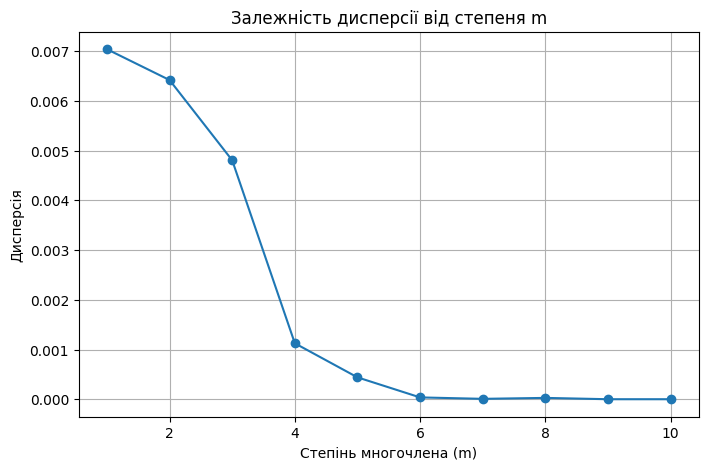

Оптимальне значення m: 9


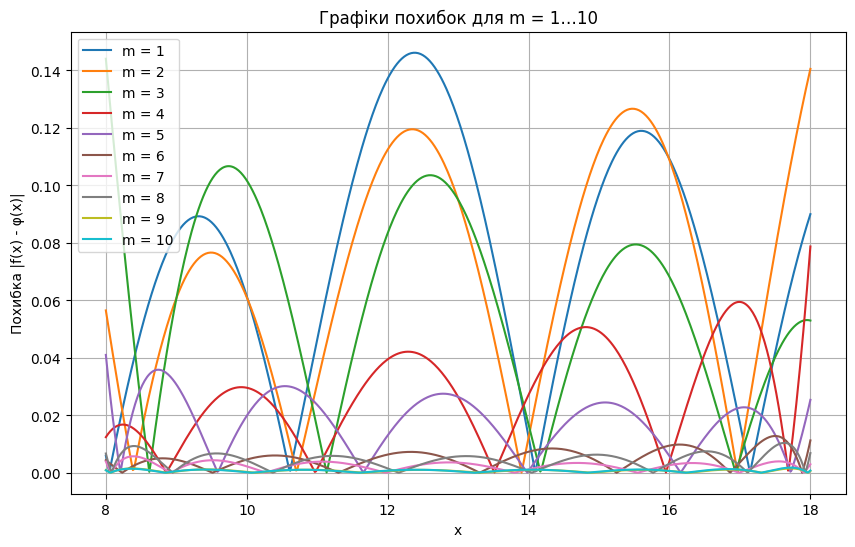

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ПАРАМЕТРИ
p = 8
x0 = p
xn = p + 10
n = 30
h = (xn - x0) / n

# === КРОК 1: Табуляція ===
x_values = np.array([x0 + i*h for i in range(n+1)])
y_values = (1/p) * np.sin(x_values + p)

# Збереження в input.txt
with open("input.txt", "w") as f:
    for xi, yi in zip(x_values, y_values):
        f.write(f"{xi:.8f} {yi:.8f}\n")

# === КРОК 2: Побудова полінома МНК ===


def build_least_squares_poly(x, y, m):
    B = np.zeros((m+1, m+1))
    C = np.zeros(m+1)

    for j in range(m+1):
        for k in range(m+1):
            B[j, k] = np.sum(x**(j + k))
        C[j] = np.sum(y * x**j)

    A = np.linalg.solve(B, C)
    return A

# === КРОК 3: Дисперсія для m = 1..10 ===


def dispersion(X, F, A):
    return np.sqrt(np.mean((F - approximate_polynomial(A, X))**2))




dispersions = []
coeffs_all = []

for m in range(1, 11):
    coeffs = build_least_squares_poly(x_values, y_values, m)
    coeffs_all.append(coeffs)
    disp = calculate_dispersion(x_values, y_values, coeffs)
    dispersions.append(disp)

# Графік дисперсії
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), dispersions, marker='o')
plt.xlabel("Степінь многочлена (m)")
plt.ylabel("Дисперсія")
plt.title("Залежність дисперсії від степеня m")
plt.grid(True)
plt.show()

# Оптимальне значення m
optimal_m = np.argmin(dispersions) + 1
print(f"Оптимальне значення m: {optimal_m}")

# === КРОК 4: Похибка на згущеній сітці ===
n2 = 20 * n
h2 = (xn - x0) / n2
x_dense = np.array([x0 + i*h2 for i in range(n2 + 1)])
true_y_dense = (1/p) * np.sin(x_dense + p)

errors = []

for coeffs in coeffs_all:
    approx_y = sum(c * x_dense**i for i, c in enumerate(coeffs))
    err = np.abs(true_y_dense - approx_y)
    errors.append(err)

# Графіки похибок
plt.figure(figsize=(10, 6))
for m in range(1, 11):
    plt.plot(x_dense, errors[m-1], label=f"m = {m}")
plt.xlabel("x")
plt.ylabel("Похибка |f(x) - φ(x)|")
plt.title("Графіки похибок для m = 1…10")
plt.legend()
plt.grid(True)
plt.show()